## 4.00 Visualization with Matplotlib

https://www.python-graph-gallery.com/

### Some background
- ```plt.style.use('classic')``` setting style... more styles in 4.12
- ```plt.show()``` used to show plots in a script, use only one per session
 - ```%matplotlib``` this is matplotlib mode
 - ```%matplotlib inline``` static images
 - ```%matplotlib notebook``` interactive images
 
 - ```fig.savefig()``` and ```Image()``` to save and import
 - ```fig.canvas.get_supported_filetypes()```
 
 Two types of interfaces: Matlab style and Object-oriented


In [123]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('classic')
%matplotlib inline


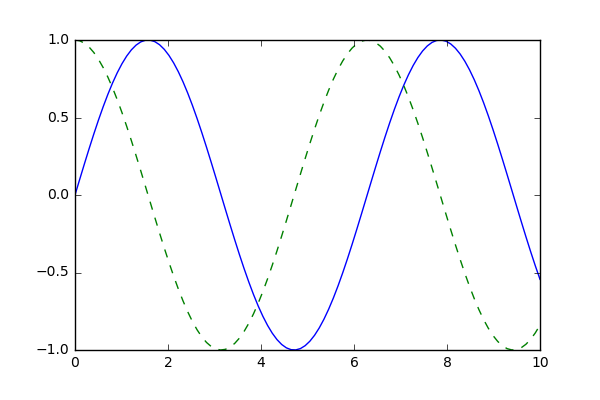

<Figure size 432x288 with 0 Axes>

In [9]:
x = np.linspace(0,10,100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--')

#Save the figure
fig.savefig('my_figure.png')

# Import to check
from IPython.display import Image
Image('my_figure.png')

## 4.01 Simple Line Plots
- I am doing the pyplot version, review the Matplot version also
- ```plt.plot(x, y, color = ' ', linestyle = ' ')```
    - ``` color = 'blue' or 'b' or '0.75'```
    - ``` linestyle = 'solid, dashed, dashdot, dotted', -, --, -., :```
    - ``` linestyle =  -, --, -., :```
- Combine color and linestyle
    - ```plt.plot(x, y, '-g') ``` solid green
    - ```plt.plot(x, y, '--r') ``` dashed red  
    - ```plt.plot(x, y, ':b') ``` dotted blue  
- Axes Limits
    - ```plt.xlim(1,10) plt.ylim(0,2)```
    - ```plt.axis([xmin, xmax, ymin, ymax])``` in one line
    - ```plt.axis('tight' or 'equal') ``` tightens the bounds or equal units
- Labeling Plots and legend
    - ```plt.title("title"), plt.xlabel(), plt.ylabel```
    - ```plt.legend()``` adds legend    
    

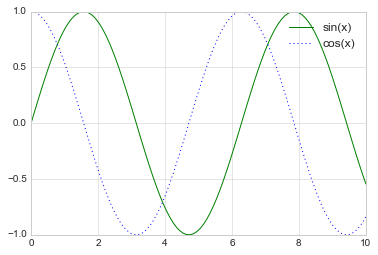

In [21]:
plt.style.use('seaborn-whitegrid')
plt.plot(x, np.sin(x), 
         color = 'g', 
         linestyle = '-',
         label = 'sin(x)')

plt.plot(x, np.cos(x), 
         ':b',
        label = 'cos(x)')

plt.xlim(0,10)
plt.ylim(-1,1)

plt.legend()

## 4.02 Scatter Plots
- ```plt.plot(x,y,'o') ``` use letters such as o, ., x, +, v, <, >
- ```plt.plot(x,y,'-ok') ``` adds line to dots
- scatter can be used to customize the size, color, shape of points
    - ```plt.scatter(x,y,marker = 'o') ```



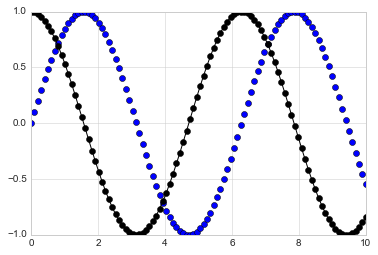

In [26]:
plt.plot(x, np.sin(x), 'o')         
plt.plot(x, np.cos(x), '-ok') 


## 4.03 Error Bars

## 4.04 Density and Contour Plots

## 4.05 Histograms, Binnings, and Density
- Can count the number of points in a given bin using ```counts, bin_edges = np.histogram(data, bins=5)```
- 2D histograms and hex binnings
- Kernel density estimation

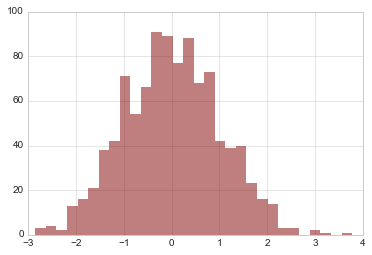

In [59]:
data = np.random.randn(1000)
plt.hist(data, 
         bins = 30,
         alpha = 0.5, # transparency
         histtype = 'stepfilled',
         edgecolor = 'none',
         color = 'maroon');

## 4.06 Customizing Plot Legends
- ``` plt.legend(....)```
    - ```loc = upper left, center, lower right'```
    - ```frameon = True``` to put rectangle...default is none
    - ```ncol = 2``` places legend side by side
    - Can specify which lines to specify with legend
- Legend for size of points - say population of cities with color or bubbles
- Create multiple legends - refer to book

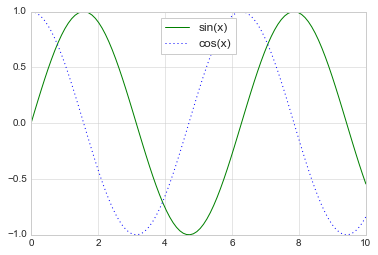

In [67]:
plt.plot(x, np.sin(x), color = 'g', linestyle = '-', label = 'sin(x)')
plt.plot(x, np.cos(x), ':b', label = 'cos(x)')
plt.legend(loc = 'upper center', frameon = True)

## 4.08 Customize colorbars

## 4.09 Multiple Subplots
- ```plt.subplot(rows, cols, plot index)``` subplot is singular
- ```plt.subplots_adjust(hspace=0.4, wspace=0.4)``` to add spacing 
- ```fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')``` subplots is plural....the x is shared by the columns and y by the rows....
- ```plt.Gridspec()``` more complicated grid spacing

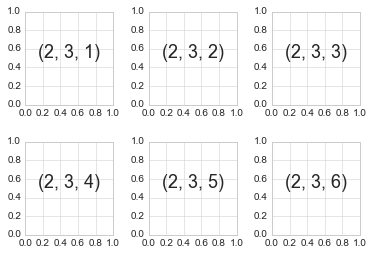

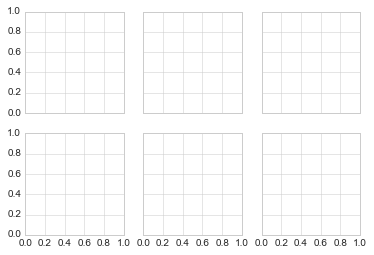

In [75]:
plt.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center');

fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

## 4.10 Text and Annotation

## 4.11 Customize Ticks
- Review the matpliotlib version of plotting.... fig, axes

## 4.12 Seaborn
- ```sns.kdeplot(data, shade = True)``` smooth histogram 
- ```sns.distplot(data)``` smooth and bar hist plot
- ```sns.pairplot(data, hue = 'factor to color by', height = ) ``` pair plots
- ```grid = sns.FacetGrid(data, row=" ", col="", margin_titles=True)```
- ```grid.map(plt.hist, "feature name", bins=np.linspace(0, 40, 15))```
- ```sns.catplot``` for box, violin, etc
- https://seaborn.pydata.org/generated/seaborn.catplot.html

In [76]:
import seaborn as sns
sns.set()

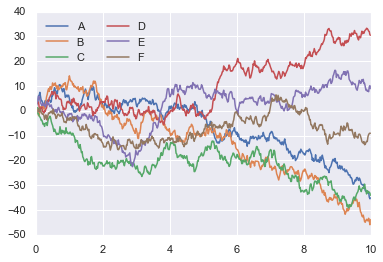

In [80]:
# Create some data
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0)

plt.plot(x,y)
plt.legend('ABCDEF', ncol = 2, loc = 'upper left')


In [81]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


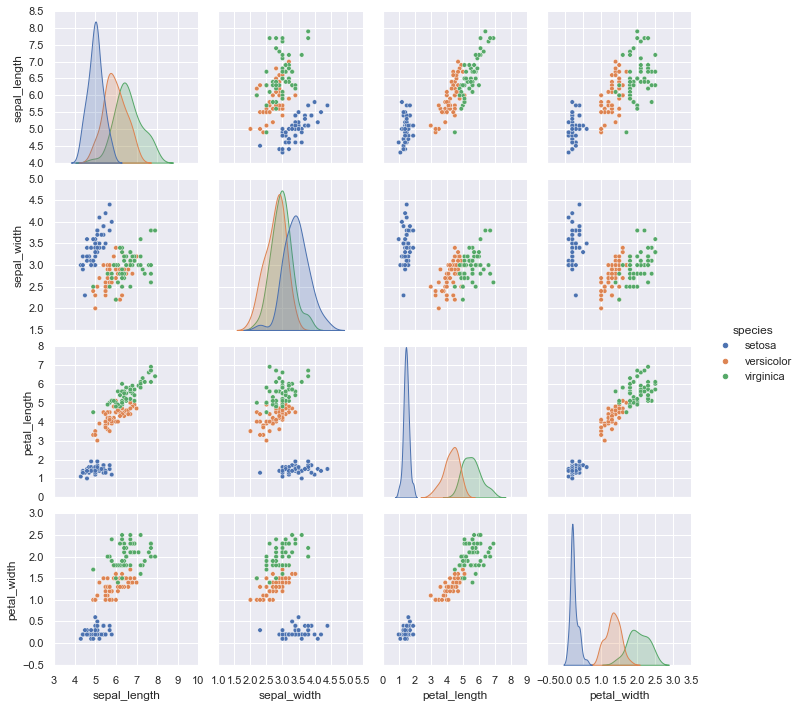

In [84]:
# pair plots
sns.pairplot(iris, hue = 'species', height = 2.5)

In [88]:
# Faceted histogram
tips = sns.load_dataset('tips')
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


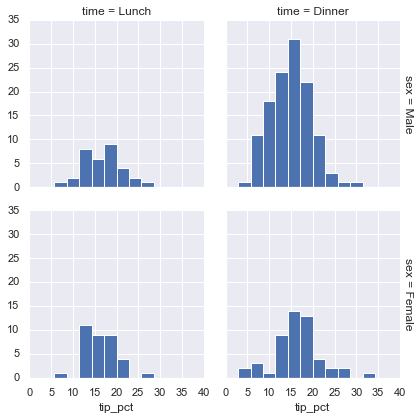

In [100]:
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']

grid = sns.FacetGrid(tips, row="sex", col="time", margin_titles=True)
grid.map(plt.hist, "tip_pct", bins=np.linspace(0, 40, 15));

grid.map?

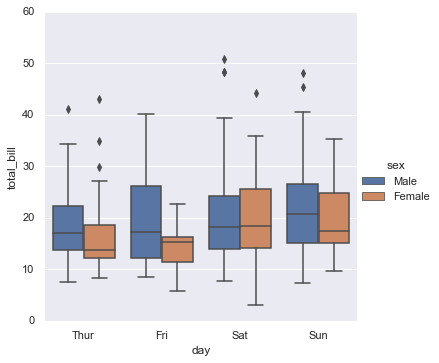

In [111]:
# Factor plots
sns.catplot(x = "day", 
            y = "total_bill", 
            hue = "sex", 
            data = tips, 
            kind = "box");


In [112]:
# Bar plots
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


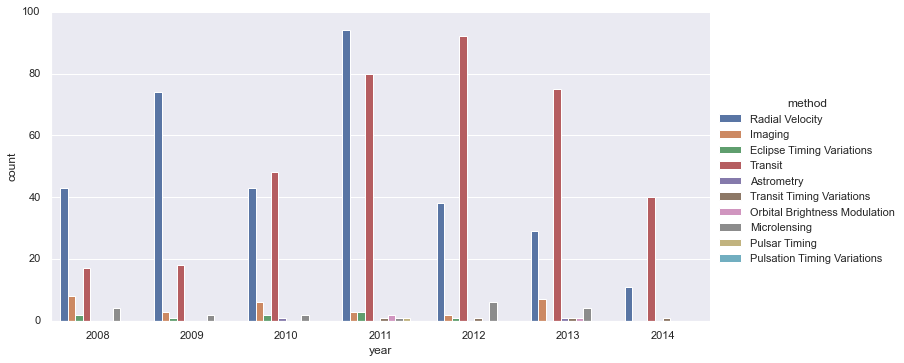

In [121]:
sns.catplot(x = "year", 
            kind = "count", 
            data = planets,
            aspect = 2,
            hue = "method",
            #color = 'blue',
            order = range(2008, 2015))

### Example - Marathon finishing times

In [124]:
data = pd.read_csv('./data/marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59
